In [1]:
%matplotlib inline
from functools import partial

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import statsmodels.api as sm
import torch

import pyro
from pyro import distributions as dist
from pyro.infer.mcmc import MCMC, NUTS
from pyro.infer.abstract_infer import EmpiricalMarginal, TracePredictive

from model4_5 import model

pyro.set_rng_seed(1234)
pyro.enable_validation(True)


## 練習問題

In [16]:
N1 = 30
N2 = 20
Y1 = dist.Normal(0, 5).sample((N1,))
Y2 = dist.Normal(1., 4.).sample((N2,))

### (1)

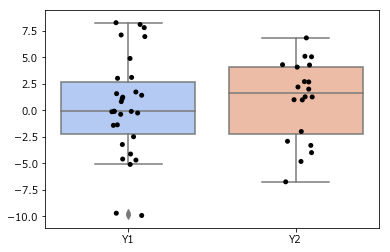

In [17]:
data = pd.concat([pd.DataFrame({"Y1":Y1}), pd.DataFrame({"Y2":Y2})], axis=1)
sns.boxplot(data=data,palette="coolwarm")
sns.stripplot(data=data, jitter=True, color='black')


### (2)

$$ Y_1 \sim Normal(\mu_1, \sigma)$$
$$ Y_2 \sim Normal(\mu_2, \sigma)$$

### (3)

In [18]:
def model1(data1, data2):
    mu1 = pyro.sample('mu1', dist.Normal(0, 100))
    mu2 = pyro.sample('mu2', dist.Normal(0, 100))
    sigma = pyro.sample('sigma', dist.Uniform(0.1, 2.7))

    with pyro.plate("data1", len(data1)):
        pyro.sample("obs_1", dist.Normal(mu1, sigma), obs=data1)
    with pyro.plate("data2", len(data2)):
        pyro.sample("obs_2", dist.Normal(mu2, sigma), obs=data2)

In [19]:
nuts_kernel1 = NUTS(model1, adapt_step_size=True, jit_compile=True, ignore_jit_warnings=True)
hmc_posterior1 = MCMC(nuts_kernel1, num_samples=1000, num_chains=4, warmup_steps=1000).run(Y1, Y2)

In [20]:
mus_posterior = EmpiricalMarginal(hmc_posterior1, ["mu1", "mu2"])._get_samples_and_weights()[0].reshape(-1, 2).detach().cpu().numpy()

### (4)

In [21]:
np.sum(mus_posterior[:, 0] < mus_posterior[:, 1]) / len(mus_posterior[:, 0])

0.821

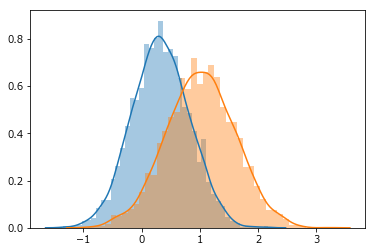

In [22]:
sns.distplot(mus_posterior[:, 0])
sns.distplot(mus_posterior[:, 1])

### (5)

$$ Y_1 \sim Normal(\mu_1, \sigma_1)$$
$$ Y_2 \sim Normal(\mu_2, \sigma_2)$$

In [23]:
def model2(data1, data2):
    mu1 = pyro.sample('mu1', dist.Normal(0, 100))
    mu2 = pyro.sample('mu2', dist.Normal(0, 100))
    sigma1 = pyro.sample('sigma1', dist.Uniform(0.1, 2.7))
    sigma2 = pyro.sample('sigma2', dist.Uniform(0.1, 2.7))

    with pyro.plate("data1", len(data1)):
        pyro.sample("obs_1", dist.Normal(mu1, sigma1), obs=data1)
    with pyro.plate("data2", len(data2)):
        pyro.sample("obs_2", dist.Normal(mu2, sigma2), obs=data2)

In [24]:
nuts_kernel2 = NUTS(model2, adapt_step_size=True, jit_compile=True, ignore_jit_warnings=True)
hmc_posterior2 = MCMC(nuts_kernel2, num_samples=1000, num_chains=4, warmup_steps=1000).run(Y1, Y2)

In [25]:
mus_posterior2 = EmpiricalMarginal(hmc_posterior2, ["mu1", "mu2"])._get_samples_and_weights()[0].reshape(-1, 2).detach().cpu().numpy()
np.sum(mus_posterior2[:, 0] < mus_posterior2[:, 1]) / len(mus_posterior2[:, 0])

0.82

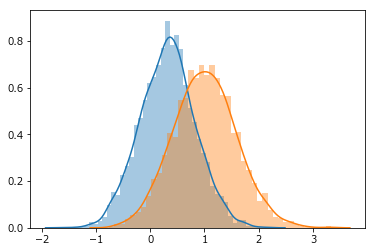

In [26]:
sns.distplot(mus_posterior2[:, 0])
sns.distplot(mus_posterior2[:, 1])

In [27]:
mus_posterior2[:, 0].mean()

0.32077742

In [28]:
mus_posterior2[:, 1].mean()

1.0076305